In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [366]:
data = pd.read_csv("Daily_data_of_Evapotranspiration_of_NRSC_Agency_during_August_2022.csv")
df = data.copy()

In [367]:
print(df.columns)
df = df[["State", "District", "Date", "Avg_etlvl_at15cm"]] # only these columns are needed

Index(['State', 'District', 'Date', 'Year', 'Month', 'Avg_etlvl_at15cm',
       'Agency_name'],
      dtype='object')


# Finding state which have null values for "Avg_etlvl_at15cm"

In [368]:
print(df.isnull().sum())
print(df.shape)

State                 0
District              0
Date                  0
Avg_etlvl_at15cm    124
dtype: int64
(22723, 4)


In [369]:
# data frame which have null value in Avg_etlvl_at15cm 
df_nan = df[df.Avg_etlvl_at15cm.isnull()]
# state which have null value in Avg_etlvl_at15cm
state_nan = list(np.unique(df_nan.State))
print(state_nan)

# finding number of rows which have null value in Avg_etlvl_at15cm for state "Andaman & Nicobar"
an_nan = df_nan[df_nan.State == "Andaman & Nicobar"].shape
# finding number of rows which have null value in Avg_etlvl_at15cm for state "Lakshadweep"
l_nan = df_nan[df_nan.State == "Lakshadweep"].shape

# as no. of days in october is 31 
# Andaman & Nicobar have three district so, total numbers of data point 3*31 = 93 = an_nan
# Lakshadweep have one district so, total numbers of data point 1*31 = 31 = l_nan


['Andaman & Nicobar', 'Lakshadweep']


1. From the data it is clear that states 'Andaman & Nicobar' and 'Lakshadweep' did not have value of evapotranspiration for all    the districts for complete month. so, the probable reason for that could be "MALFUNCTION OF EQUIPMENT" or "FAULTY EQUIPMENT"

# Finding Average evapotranspiration for each states

In [370]:
# Dropping rows which have null value in "Avg_etlvl_at15cm"
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)

State               0
District            0
Date                0
Avg_etlvl_at15cm    0
dtype: int64
(22599, 4)


In [371]:
df_groupby_state_mean = df.groupby(df.State)["Avg_etlvl_at15cm"].mean()
state = [x for x,eva in df_groupby_state_mean.items()]
eva = [eva for x,eva in df_groupby_state_mean.items()]

In [372]:
# average evaportanspiration for INDIA 
avg_eva = df.Avg_etlvl_at15cm.mean()
avg_list = [round(avg_eva,2) for x in state]
print(avg_eva)

4.053503025587933


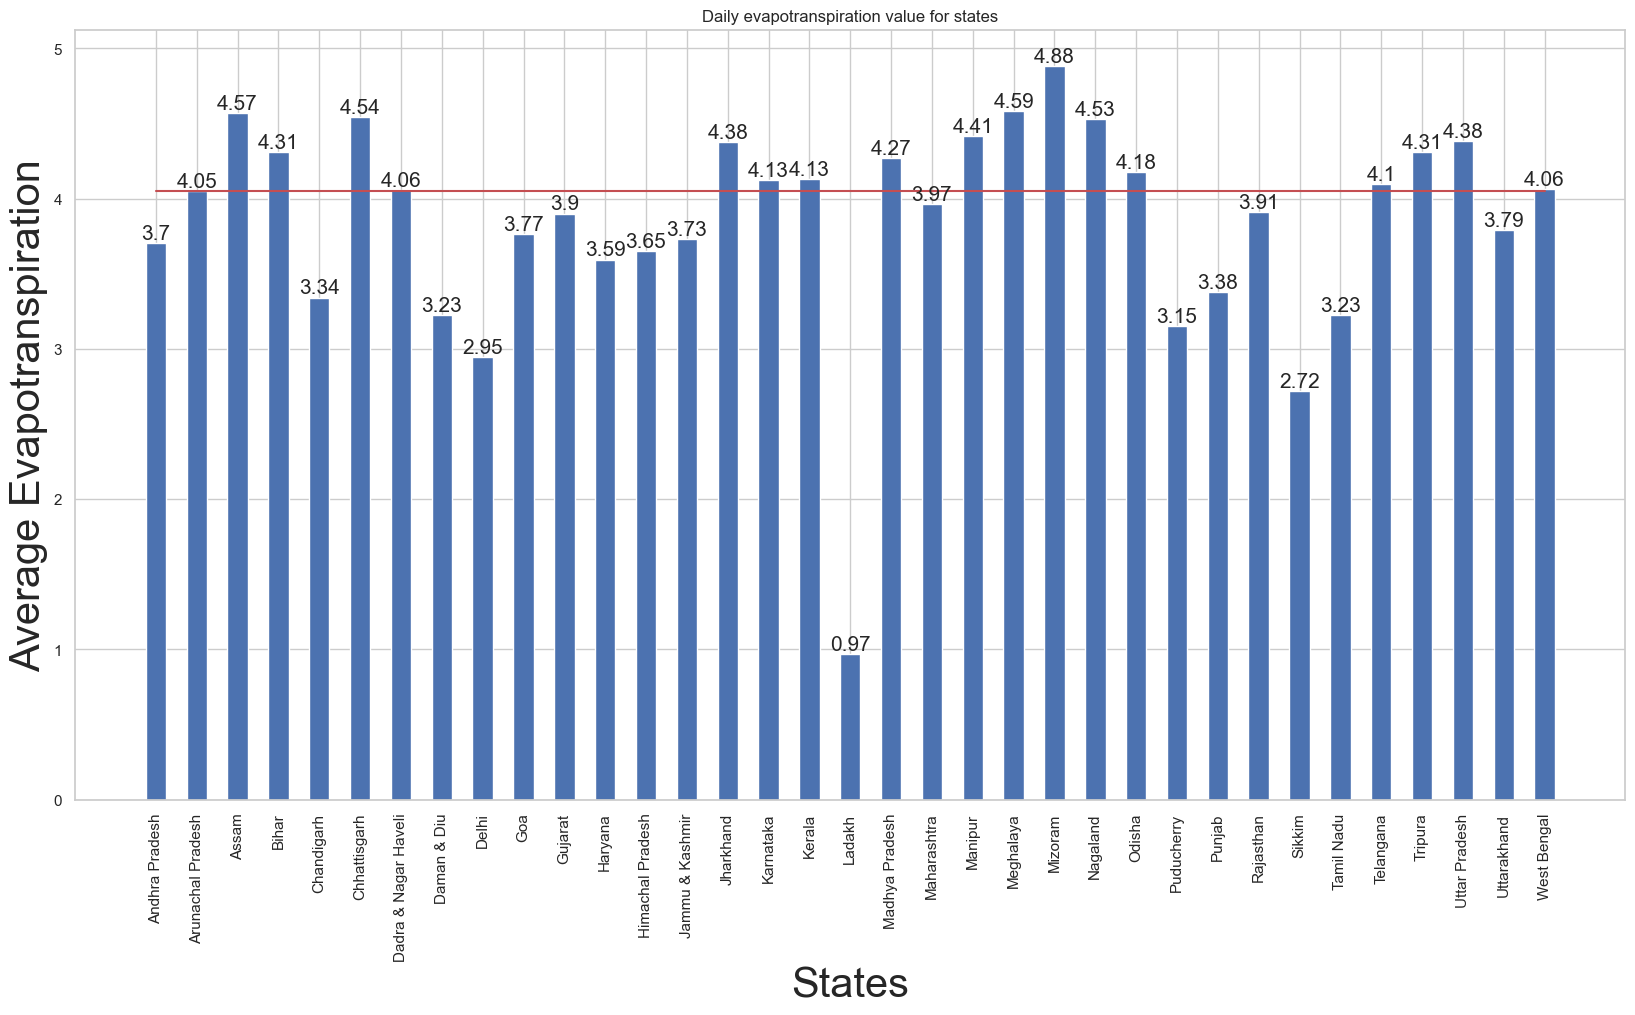

In [373]:
plt.figure(figsize=(20,10))
f = {"size":15}
f1 = {"size":30}
plt.bar(state, eva, width = 0.5)
plt.plot(state, avg_list, color="r")

plt.xticks(rotation= 90)
plt.xlabel("States",fontdict=f1)
plt.ylabel("Average Evapotranspiration",fontdict=f1)
plt.title("Daily evapotranspiration value for states")
for i in range(len(state)):
    plt.text(i,eva[i],round(eva[i],2),ha="center",va="bottom",fontdict=f)
plt.show()

1. comparing the total evapotranspiration is meaningless as states like uttar pradesh are large in area hence adding all the   evapotranspiration will be very high compare to other states, so i have compared average daily evapotranspiration value for each state. so "Mizoram" has the highest average daily evapotranspiration and "Ladakh" has the lowest, where as the average daily evapotranspiration for India is shown by read line with value 4.05. also we can see many of the states have lesser avg. daily evapotranspiration then country's avg.

2. also highest value of evapotranspiration shows higher vegetation cover for Mizoram, as one of the factor for higher            evapotranspiration is Forest. 

# claculating standard deviation in the value of Avg_etlvl_at15cm for each state

In [374]:
df_groupby_state_SD = df.groupby(df.State)["Avg_etlvl_at15cm"].std()
sd_dict = {x: round(sd,2) for x,sd in df_groupby_state_SD.items()}


In [375]:
# this data i got from wikipidea where states are sorted in the order of there land area(descending order)
state_sorted_area = ["Rajasthan","Madhya Pradesh","Maharashtra","Uttar Pradesh","Jammu & Kashmir","Gujarat","Karnataka","Andhra Pradesh","Odisha","Chhattisgarh","Tamil Nadu","Telangana","Bihar","West Bengal","Arunachal Pradesh","Jharkhand","Assam","Ladakh","Himachal Pradesh","Uttarakhand","Punjab","Haryana","Kerala","Meghalaya","Manipur","Mizoram","Nagaland","Tripura","Sikkim","Goa","Delhi","Dadra & Nagar Haveli","Puducherry","Chandigarh","Daman & Diu"]
print(len(state_sorted_area))

35


In [376]:
sd_sorted = []
for i in state_sorted_area:
    sd_sorted.append(sd_dict[i])
print(sd_sorted)

[0.79, 0.71, 0.65, 0.72, 1.09, 0.57, 0.6, 0.73, 0.76, 0.85, 1.2, 0.63, 0.61, 0.63, 1.54, 0.76, 0.83, 0.46, 1.1, 0.75, 1.37, 1.14, 0.71, 0.92, 1.1, 1.33, 1.13, 0.88, 0.86, 0.57, 1.03, 0.47, 1.25, 0.64, 0.61]


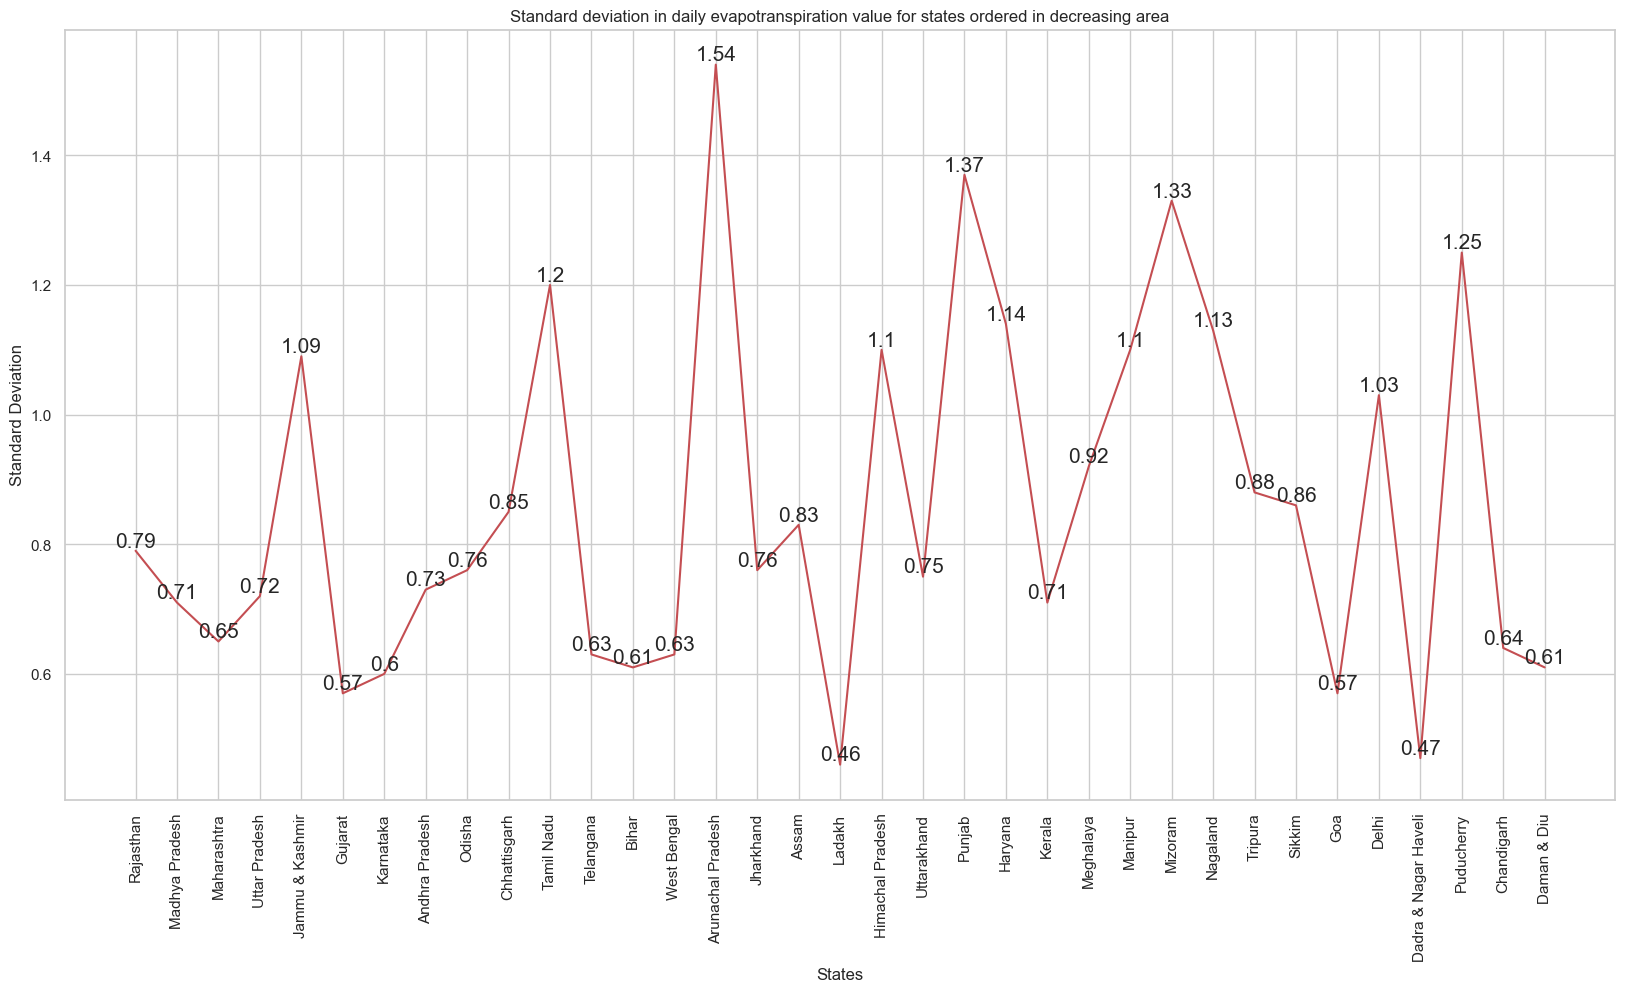

In [377]:
plt.figure(figsize=(20,10))
# f = {"size":15}
# f1 = {"size":30}
# plt.bar(state, eva, width = 0.5)
plt.plot(state_sorted_area, sd_sorted, color="r")

plt.xticks(rotation= 90)
plt.xlabel("States")
plt.ylabel("Standard Deviation")
plt.title("Standard deviation in daily evapotranspiration value for states ordered in decreasing area")
for i in range(len(state)):
    plt.text(i,sd_sorted[i],sd_sorted[i],ha="center",va="bottom",fontdict=f) # standard deviation are shown above all the bars
plt.show()

i thought state with larger area, the value of standard deviation will be low and for smaller area it will high,
but no such trend is shown by the above line graph.
but it is sure that state which are larger in terms of area and still have less SD, shows even distribution of precipitation and good maintenance by the authority, evenly spaced equipment.

# lets see the variation of Avg_etlvl_at15cm over the complete month for all the district of Mizoram(highest evapotranspiration state)

In [378]:
df_mizoram = df[df.State == "Mizoram"]
df_mizoram["Date"] = pd.to_datetime(df_mizoram.Date)
dist_name = list(np.unique(df_mizoram.District))
print(dist_name)
print(len(dist_name))

['Aizawl', 'Champhai', 'Kolasib', 'Lawngtlai', 'Lunglei', 'Mamit', 'Saiha', 'Serchhip']
8


C:\Users\DELL\AppData\Local\Temp\ipykernel_13228\2236566286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mizoram["Date"] = pd.to_datetime(df_mizoram.Date)


In [379]:
df_Aizawl = df_mizoram[df_mizoram.District == "Aizawl"][["Date","Avg_etlvl_at15cm"]].sort_values("Date")
df_Champhai = df_mizoram[df_mizoram.District == "Champhai"][["Date","Avg_etlvl_at15cm"]].sort_values("Date")
df_Kolasib = df_mizoram[df_mizoram.District == "Kolasib"][["Date","Avg_etlvl_at15cm"]].sort_values("Date")
df_Lawngtlai = df_mizoram[df_mizoram.District == "Lawngtlai"][["Date","Avg_etlvl_at15cm"]].sort_values("Date")
df_Lunglei = df_mizoram[df_mizoram.District == "Lunglei"][["Date","Avg_etlvl_at15cm"]].sort_values("Date")
df_Mamit = df_mizoram[df_mizoram.District == "Mamit"][["Date","Avg_etlvl_at15cm"]].sort_values("Date")
df_Saiha = df_mizoram[df_mizoram.District == "Saiha"][["Date","Avg_etlvl_at15cm"]].sort_values("Date")
df_Serchhip = df_mizoram[df_mizoram.District == "Serchhip"][["Date","Avg_etlvl_at15cm"]].sort_values("Date")

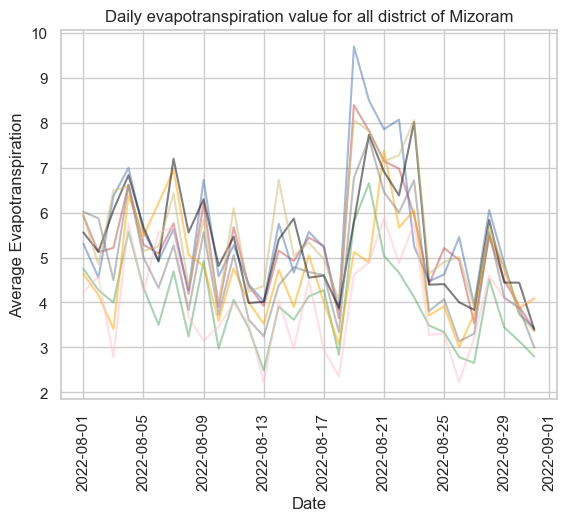

In [380]:
plt.plot(df_Aizawl.Date, df_Aizawl.Avg_etlvl_at15cm, color="r",alpha = 0.5,label="Aizawl")
plt.plot(df_Champhai.Date, df_Champhai.Avg_etlvl_at15cm, color="g",alpha = 0.5,label="Champhai")
plt.plot(df_Kolasib.Date, df_Kolasib.Avg_etlvl_at15cm, color="b",alpha = 0.5,label="Kolasib")
plt.plot(df_Lawngtlai.Date, df_Lawngtlai.Avg_etlvl_at15cm, color="orange",alpha = 0.5,label="Lawngtlai")
plt.plot(df_Lunglei.Date, df_Lunglei.Avg_etlvl_at15cm, color="black",alpha = 0.5,label="Lunglei")
plt.plot(df_Mamit.Date, df_Mamit.Avg_etlvl_at15cm, color="y",alpha = 0.5,label="Mamit")
plt.plot(df_Saiha.Date, df_Saiha.Avg_etlvl_at15cm, color="pink",alpha = 0.5,label="Saiha")
plt.plot(df_Serchhip.Date, df_Serchhip.Avg_etlvl_at15cm, color="grey",alpha = 0.5,label="Serchhip")
plt.title("Daily evapotranspiration value for all district of Mizoram")
plt.xticks(rotation= 90)
plt.xlabel("Date")
plt.ylabel("Average Evapotranspiration")
plt.show()

As from the plot we can see that variation of daily evapotranspiration across all the district is almost same.
also Mizoram is a small state with area 21,081 square KM, with eight district.
this graph inference that demographically all the district of Mizoram recieve some how same amount of precipitation.

also the rainfall and vegetation cover for all the district are somehow same

also at 2022-08-20, evapotranspiration value was highest for all the district, so we can say probably at that day rain happen on Mizoram


# lets see how correlated the evapotranspiration data of Mizoram and its neighbour Manipur

In [381]:
#lets find the average value of evapotranspiration for all days in october among the all district of that state such that for 
#a particular state we have one data point for each day

# for MIZORAM state
df_mizoram_date = df_mizoram.groupby(df.Date)["Avg_etlvl_at15cm"].mean()
date = [x for x,_ in df_mizoram_date.items()]
eva_mizoram = [eva for x,eva in df_mizoram_date.items()]
# for MANIPUR state
df_manipur = df[df.State == "Manipur"]
df_manipur_date = df_manipur.groupby(df.Date)["Avg_etlvl_at15cm"].mean()
eva_manipur = [eva for x,eva in df_mizoram_date.items()]
print(eva_manipur)



[5.295721297825, 4.817911147275, 4.8518271284, 6.4207876842625, 5.0897160732625, 4.9713412992, 5.9483518307375, 4.271137505575, 5.4392993454, 3.8810112659, 5.0465120597375, 3.947334862625, 3.4755140762125003, 5.0112929514125, 4.4701053319625, 4.908756409025, 4.48508829325, 3.3768948329, 6.779461030375, 6.9930714566875, 6.7241243393375, 6.2383341286875, 6.2410414912375, 4.02509888105, 4.2223719464875, 3.8202821428875, 3.5161331587, 5.4045882109250005, 4.3686248245875, 3.8282045722499998, 3.442653891275]


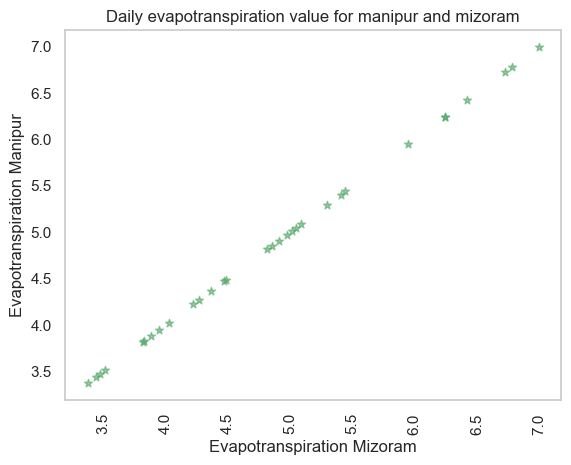

In [382]:
# plt.figure(figsize=(20,10))
# f = {"size":15}
# f1 = {"size":30}
# plt.bar(state, eva, width = 0.5)
plt.scatter(eva_mizoram,eva_manipur,color="g",marker="*",alpha=0.6)
plt.xticks(rotation= 90)
plt.xlabel("Evapotranspiration Mizoram")
plt.ylabel("Evapotranspiration Manipur")
plt.title("Daily evapotranspiration value for manipur and mizoram")
plt.grid()
# for i in range(len(state)):
#     plt.text(i,sd_sorted[i],sd_sorted[i],ha="center",va="bottom",fontdict=f) # standard deviation are shown above all the bars
plt.show()

In [383]:
# lets also compare value of evapotranspiration for Mizoram and a state from south, Karnataka

In [384]:
df_karnataka = df[df.State == "Karnataka"]
df_karnataka_date = df_karnataka.groupby(df.Date)["Avg_etlvl_at15cm"].mean()
eva_karnataka = [eva for x,eva in df_karnataka_date.items()]

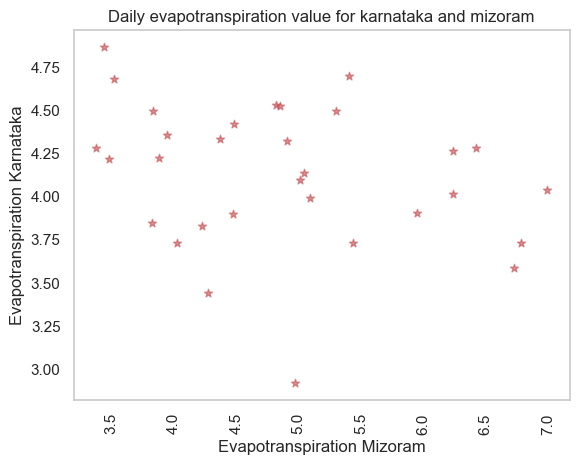

In [385]:
# plt.figure(figsize=(20,10))
# f = {"size":15}
# f1 = {"size":30}
# plt.bar(state, eva, width = 0.5)
plt.scatter(eva_mizoram,eva_karnataka,color="r",marker="*",alpha=0.6)
plt.xticks(rotation= 90)
plt.xlabel("Evapotranspiration Mizoram")
plt.ylabel("Evapotranspiration Karnataka")
plt.title("Daily evapotranspiration value for karnataka and mizoram")
plt.grid()
# for i in range(len(state)):
#     plt.text(i,sd_sorted[i],sd_sorted[i],ha="center",va="bottom",fontdict=f) # standard deviation are shown above all the bars
plt.show()

from the above two scatter plot it is clear that states which a neighbour like Mizoram and manipur have average daily evapotranspiration values are highly correlated, this is possibly due to same weather conditions and extent of same vegetation cover.
but states like Mizoram and Karnataka which are far apart have no correlation between them because weather condition at Mizoram and karnatak are different at the month of october.

# lets club the states into different zones


In [386]:
eva_states = []
for i in state_sorted_area:
    df_s = df[df.State == i]
    df_s_date = df_s.groupby(df.Date)["Avg_etlvl_at15cm"].mean()
    date3 = [x for x,_ in df_s_date.items()]
    if date3 == date:
        eva_s = [eva for x,eva in df_s_date.items()]
        eva_states.append(eva_s)

state_data_dict = {}
for i in range(len(state_sorted_area)):
    state_data_dict[state_sorted_area[i]] = np.array(eva_states[i])

In [387]:
# North Zone: Himachal Pradesh, Punjab, Uttarakhand, Jammu & Kashmir, Ladakh, Chandigarh and Haryana
north_zone = (state_data_dict["Himachal Pradesh"] + state_data_dict["Punjab"] + state_data_dict["Uttarakhand"]+state_data_dict["Jammu & Kashmir"]+state_data_dict["Ladakh"]+state_data_dict["Chandigarh"]+state_data_dict["Haryana"])/7

# East Zone: Bihar, Odisha, Jharkhand, and West Bengal.
east_zone=(state_data_dict["Bihar"] + state_data_dict["Odisha"]+state_data_dict["Jharkhand"]+state_data_dict["West Bengal"])/4

# West Zone: Rajasthan , Gujarat, Goa, Dadra & Nagar Haveli, Daman & Diu and Maharashtra.
west_zone = (state_data_dict["Rajasthan"] + state_data_dict["Gujarat"] + state_data_dict["Goa"]+state_data_dict["Dadra & Nagar Haveli"]+state_data_dict["Daman & Diu"]+state_data_dict["Maharashtra"])/6

# South Zone: Andhra Pradesh, Karnataka, Kerala, Telangana, Puducherry and Tamil Nadu
south_zone = (state_data_dict["Andhra Pradesh"] + state_data_dict["Karnataka"] + state_data_dict["Kerala"]+state_data_dict["Telangana"]+state_data_dict["Puducherry"]+state_data_dict["Tamil Nadu"])/6

# Central Zone: Madhya Pradesh, Uttar Pradesh, Delhi and Chhattisgarh 
central_zone=(state_data_dict["Madhya Pradesh"] + state_data_dict["Uttar Pradesh"]+state_data_dict["Delhi"]+state_data_dict["Chhattisgarh"])/4

# North East Zone - Assam, Sikkim, Nagaland, Meghalaya, Manipur, Mizoram, Tripura and Arunachal Pradesh
north_east_zone = (state_data_dict["Assam"] + state_data_dict["Sikkim"] + state_data_dict["Nagaland"]+state_data_dict["Meghalaya"]+state_data_dict["Manipur"]+state_data_dict["Mizoram"]+state_data_dict["Tripura"]+state_data_dict["Arunachal Pradesh"])/8

In [388]:
zone_dict = {"North Zone":north_zone,
            "East Zone":east_zone,
            "West Zone":west_zone,
            "South Zone":south_zone,
            "Central Zone":central_zone,
            "North East Zone":north_east_zone}
zone_data = pd.DataFrame(zone_dict)

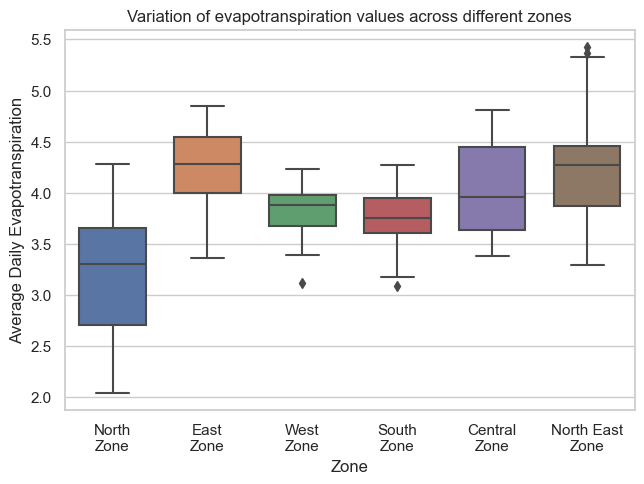

In [389]:
sns.set(style = "whitegrid")
# fig, ax = plt.subplot(figsize=(8,6))
g = sns.boxplot(data=zone_data, width=0.7)
plt.title("Variation of evapotranspiration values across different zones")
xvalues = ["North\nZone","East\nZone","West\nZone","South\nZone","Central\nZone","North East\nZone"]
plt.xticks(np.arange(6), xvalues)
plt.tight_layout()
plt.xlabel("Zone")
plt.ylabel("Average Daily Evapotranspiration")
plt.show()



1.from the above box plot we can see that, evapotranspiration is low in low temperature region of India, i.e. north zone.
2.West and South zone have some how same range of values of evapotranspiration due to there high temperature and also both zone   share coastline, which are the major factors for evapotranspiration.
3.North East region have higher median value due to more forest cover area


4. North zone has wide range of value for evapotranspiration as in north region we have state like Harayana having high value and state like Jammu and kashmir which have low value.
but overall the median value is least compare to all zones, due to low temperature as a zone.

# lets plot the pair plot for states in a zone for example central zone

In [390]:
# plotting pair plots for different zones is not useful as they will have very differnt climatic conditions
# so lets do pair plot states in a zone and get some insight.

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


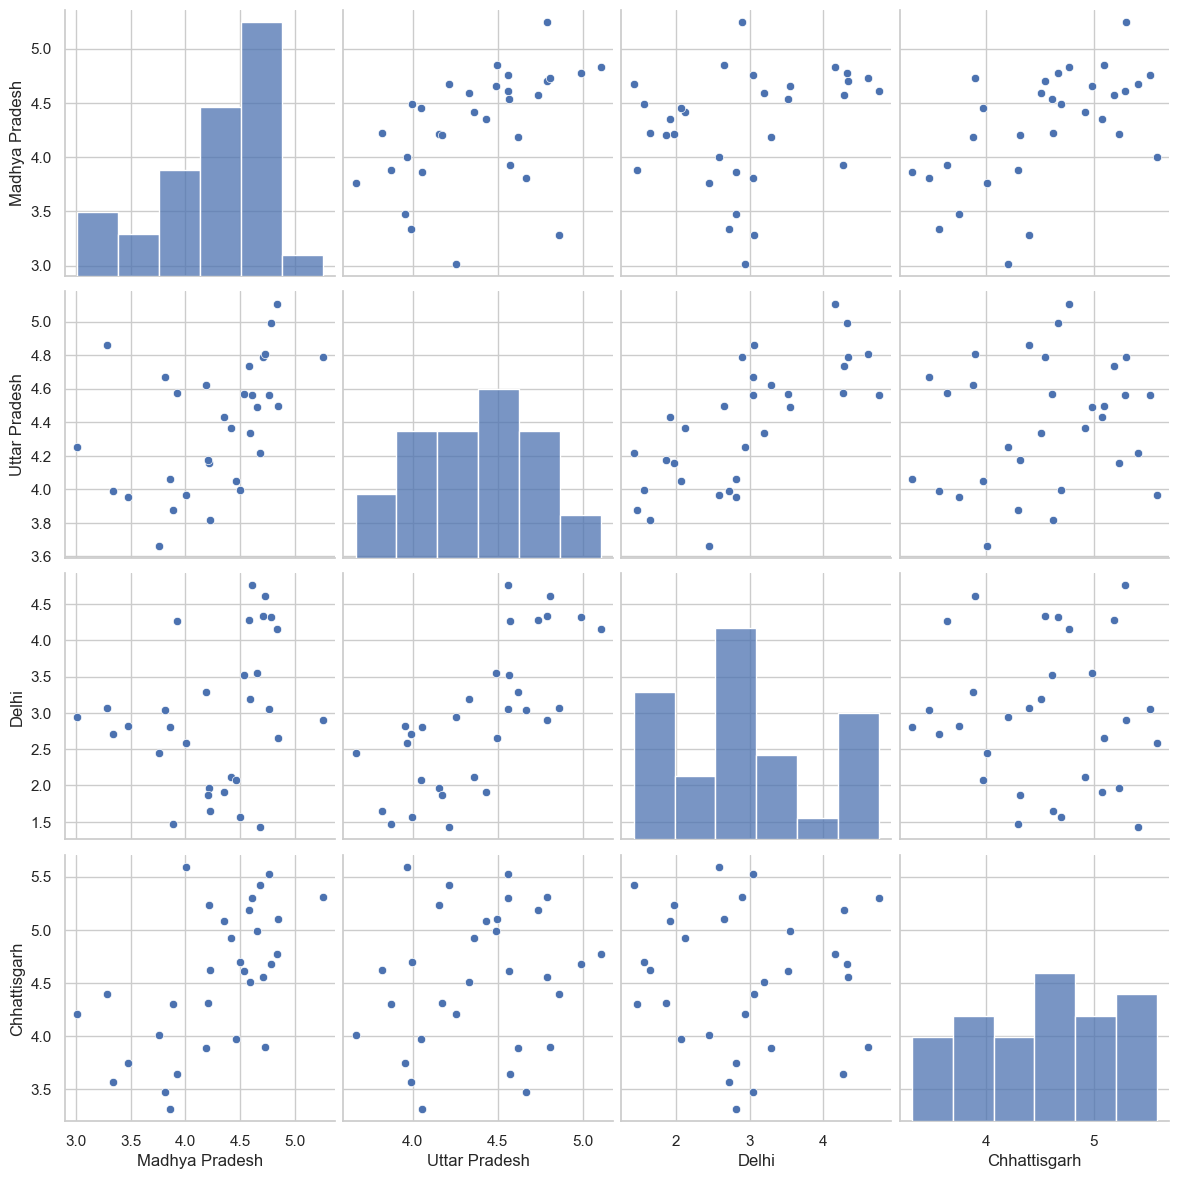

In [391]:
central_zone_dict = {"Madhya Pradesh":state_data_dict["Madhya Pradesh"],
                    "Uttar Pradesh":state_data_dict["Uttar Pradesh"],
                    "Delhi":state_data_dict["Delhi"],
                    "Chhattisgarh":state_data_dict["Chhattisgarh"]}
central_data = pd.DataFrame(central_zone_dict)

sns.set_style("whitegrid")
sns.pairplot(central_data,size=3)
plt.show()

1.frome the above pair plot it is clear that states which share common boundary have some extent of correlation between the  evapotranspiration value but to shared climatic conditions, example see pair plot of (delhi, U.P.),(chhattisgarh, M.P.) etc

2. so from the above point we can conclude that more finer we go more correlation we can see,
so lets plot pair plot for all district of any state lets take Delhi.

# Plotting pair plot for districts in Delhi

In [392]:
df_delhi = df[df.State == "Delhi"]
df_delhi["Date"] = pd.to_datetime(df_delhi.Date)
dist_name = list(np.unique(df_delhi.District))
print(dist_name)
print(len(dist_name))

['Central', 'East', 'New Delhi', 'North', 'North East', 'North West', 'Shahdara', 'South', 'South East', 'South West', 'West']
11


C:\Users\DELL\AppData\Local\Temp\ipykernel_13228\1356892753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi["Date"] = pd.to_datetime(df_delhi.Date)


In [393]:
eva_dist = []
for i in dist_name:
    df_s["Date"] = pd.to_datetime(df_s.Date)
    df_s = df_delhi[df_delhi.District == i][["Date","Avg_etlvl_at15cm"]].sort_values("Date")
    eva = list(df_s["Avg_etlvl_at15cm"])
    eva_dist.append(eva)

delhi_dist_dict = {}
for i in range(len(dist_name)):
    delhi_dist_dict[dist_name[i]] = np.array(eva_dist[i])
    
delhi_data = pd.DataFrame(delhi_dist_dict)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13228\1996420771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s["Date"] = pd.to_datetime(df_s.Date)


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


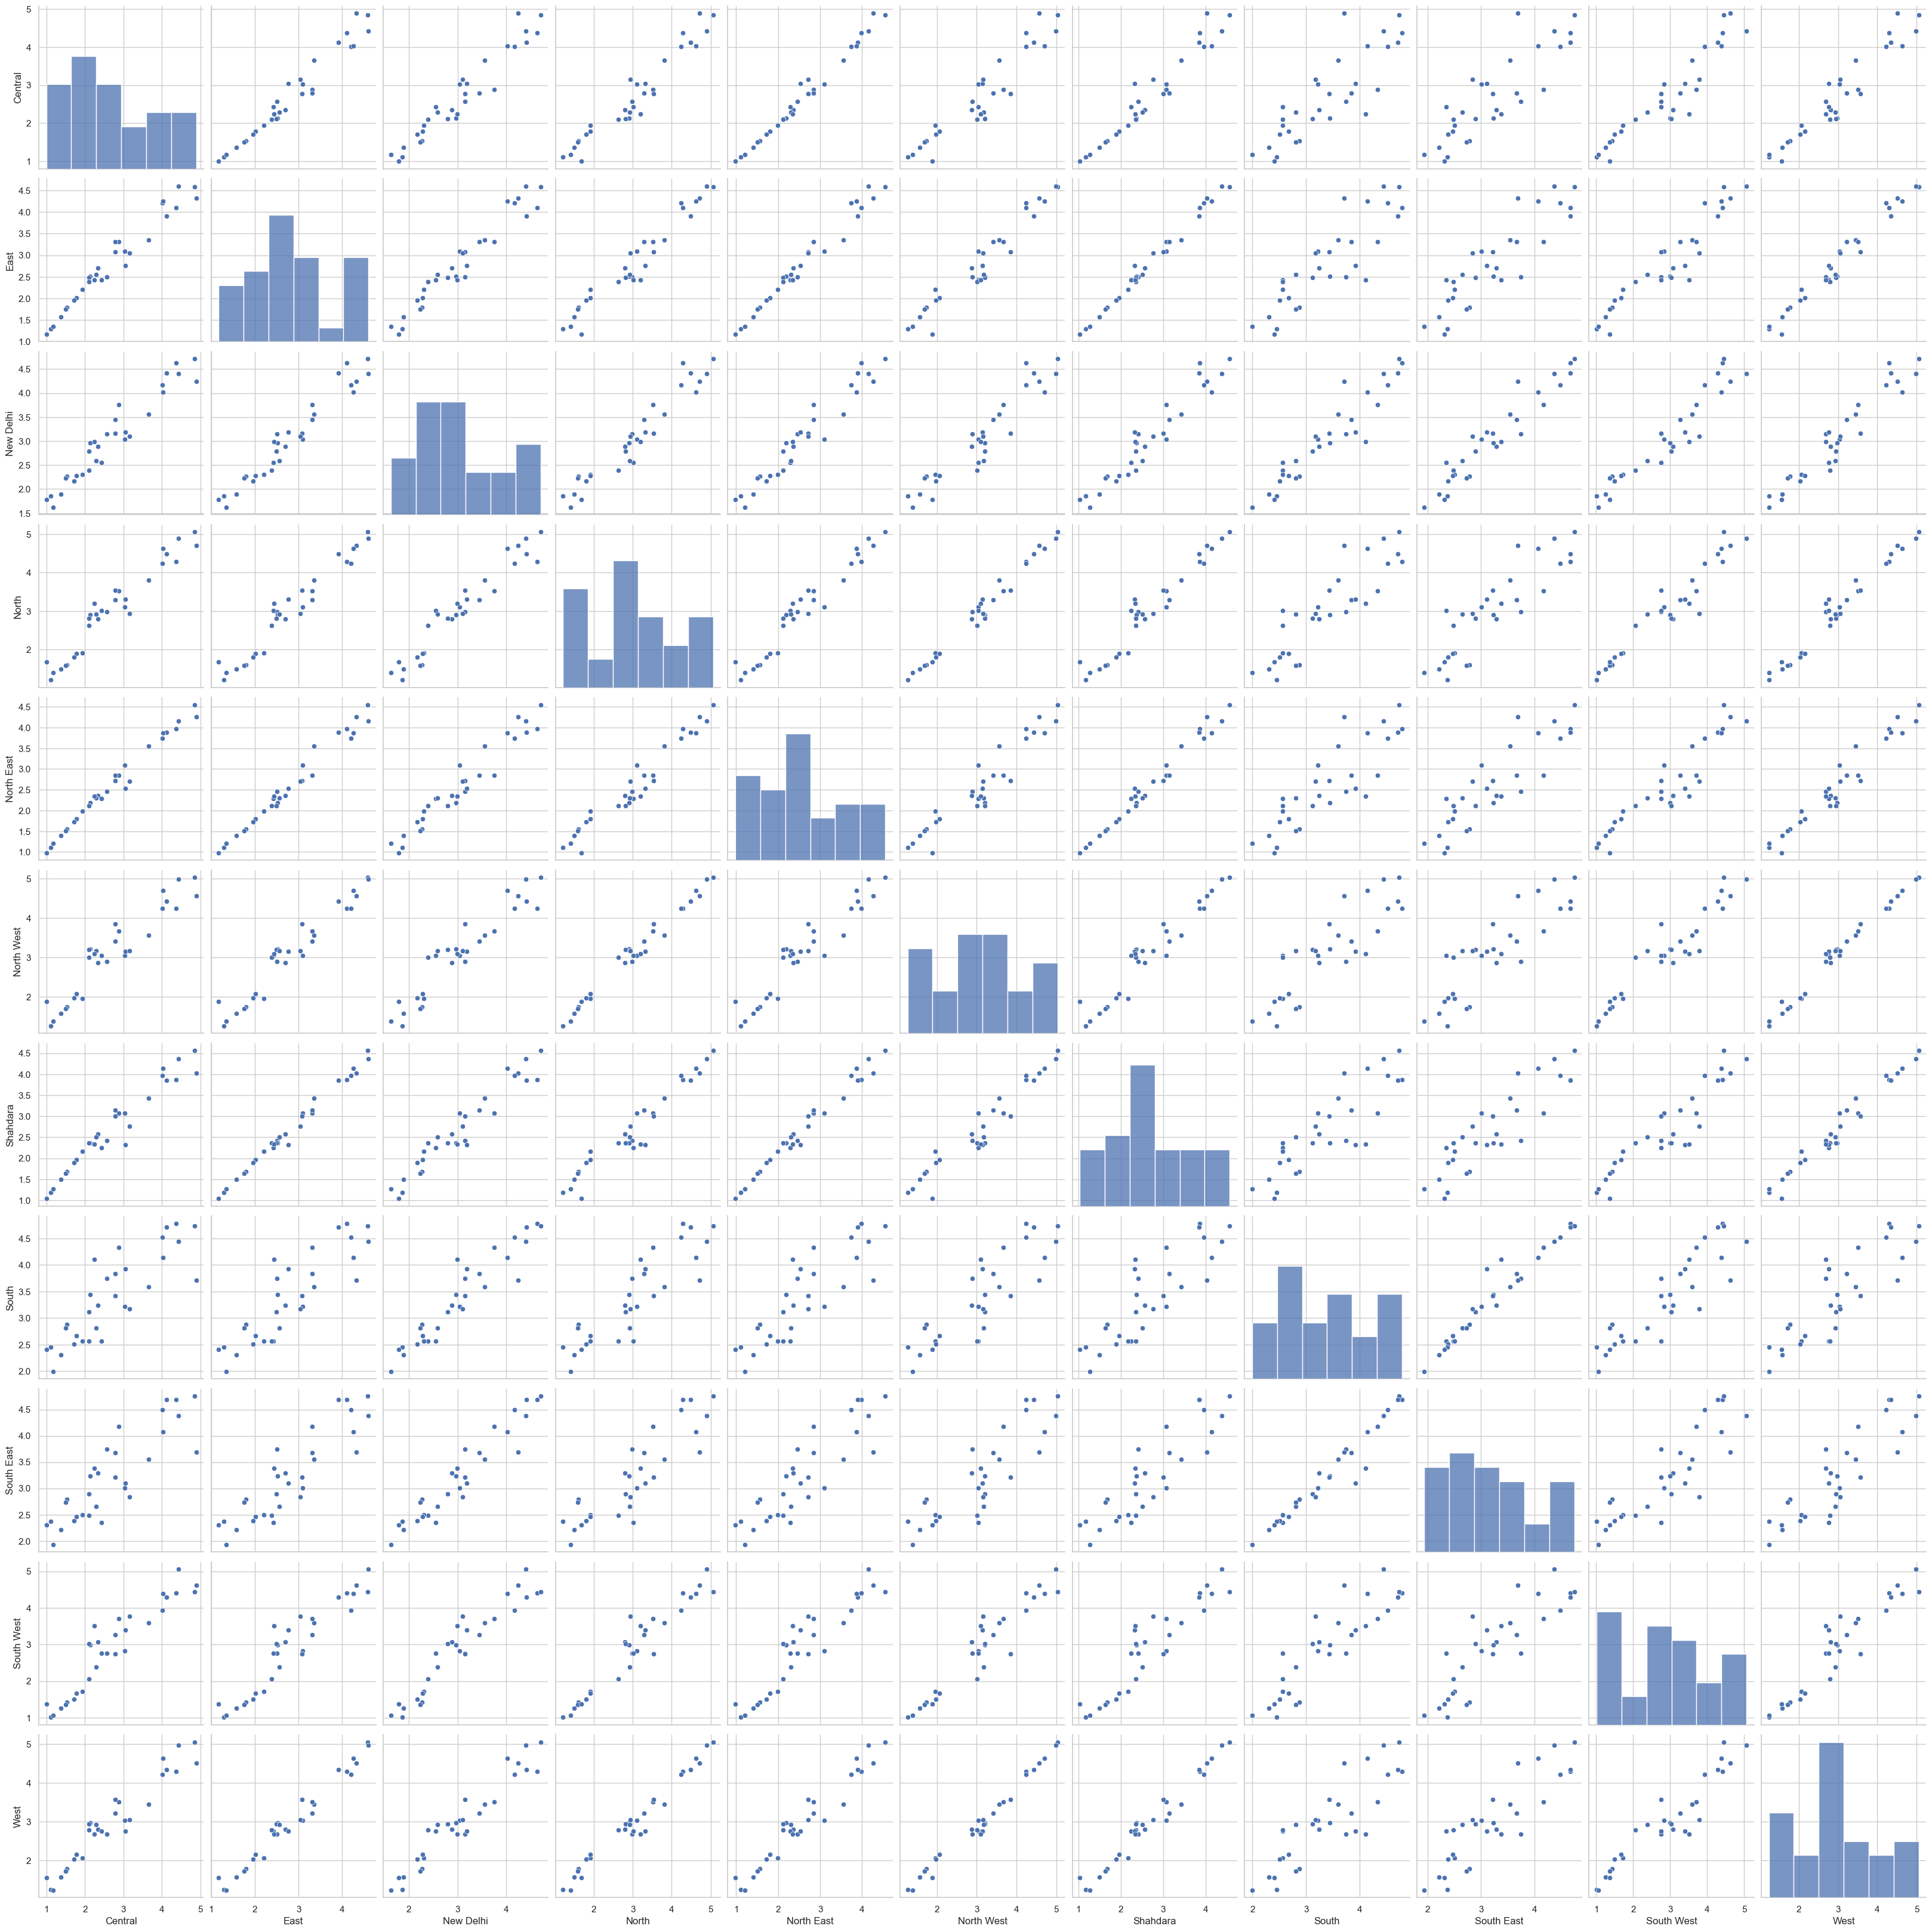

In [394]:
sns.set_style("whitegrid")
sns.pairplot(delhi_data,size=3)
plt.show()

so as we thought, the pair plots are coming in that way only, so for all district of delhi the evapotranspiration values are highly correlated as they share the same weather condition.
so if you look data at zone level it will be very less correlated then neighbouring state wise and then highly correlated in district wise of same data.